# Two Body Orbital Problem

The equations of motion for a two-body orbit can be found by solving F=ma, 4 times for x1, x2, y1 and y2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
class Two_Body_Orbit:
    
    def __init__(self, G, m1, m2):
        """
        Initialization function
        parameters: G (gravitational coeff), m1 (mass 1), m2(mass 2)
        """
        self.G = G
        self.m1 = m1
        self.m2 = m2
        
    def dy_dt(self, t, y):
        """     
        Returns righthand side of the diff equation
        parameters: t (time), y (array of derivatives)
        """
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = y #retrieve vectors from input array
        k = G/(((x1-x2)**2.+(y1-y2)**2.)**1.5) #calculate k
        
        ddx1 = -k * m2 * (x1-x2)
        ddx2 = k * m1 * (x1-x2)
        ddy1 = -k * m2 * (y1-y2)
        ddy2 = k * m1 * (y1-y2)
        return [x1_dot, ddx1, y1_dot, ddy1, x2_dot, ddx2, y2_dot, ddy2 ]
    
    def solve_ode(self, t_pts, y):
        """ Solves the differential equation for the equations of motion for mass 1 and 2
            parameters: t_pts (array of times), y (array of initial conditions)
            y = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
        """
        err = 1.0e-10
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts,
                            atol=err, rtol=err,  method='RK45')
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
    
    def solve_ode_Leapfrog(self, t_pts, y, delta_t):
        """
        Solves the differential equation using the Leapfrog method
        parameters: t_pts (array of times), y (array of initial conditions), delta_t (spacing of t_pts)
        """
        x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0 = y        
        
        #Create emtpy arrays with same length as t_pts for parameters
        x1 = np.zeros(len(t_pts))
        x1_dot = np.zeros(len(t_pts))
        x1_dot_half = np.zeros(len(t_pts))
        y1 = np.zeros(len(t_pts))
        y1_dot = np.zeros(len(t_pts))
        y1_dot_half = np.zeros(len(t_pts))
        x2 = np.zeros(len(t_pts))
        x2_dot = np.zeros(len(t_pts))
        x2_dot_half = np.zeros(len(t_pts))
        y2 = np.zeros(len(t_pts))
        y2_dot = np.zeros(len(t_pts))
        y2_dot_half = np.zeros(len(t_pts))
        
        #Add initial conditions to first element of each array
        x1[0] = x1_0
        y1[0] = y1_0
        x2[0] = x2_0
        y2[0] = y2_0
        x1_dot[0] = x1_dot_0
        y1_dot[0] = y1_dot_0
        x2_dot[0] = x2_dot_0
        y2_dot[0] = y2_dot_0
        
        # step through the differential equation
        for i in np.arange(len(t_pts) - 1):
            t = t_pts[i] #time at index i
            y = [x1[i], x1_dot[i], y1[i], y1_dot[i], x2[i], x2_dot[i], y2[i], y2_dot[i]]
            
            x1_dot_half[i] = x1_dot[i] + self.dy_dt(t,y)[1] * delta_t/2.
            y1_dot_half[i] = y1_dot[i] + self.dy_dt(t,y)[3] * delta_t/2.
            x2_dot_half[i] = x2_dot[i] + self.dy_dt(t,y)[5] * delta_t/2.
            y2_dot_half[i] = y2_dot[i] + self.dy_dt(t,y)[7] * delta_t/2.
            
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t 
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t 
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t 
            
            y = [x1[i+1], x1_dot[i], y1[i+1], y1_dot[i], x2[i+1], x2_dot[i], y2[i+1], y2_dot[i]]
            
            x1_dot[i+1] = x1_dot_half[i] + self.dy_dt(t,y)[1] * delta_t/2.
            y1_dot[i+1] = y1_dot_half[i] + self.dy_dt(t,y)[3] * delta_t/2.
            x2_dot[i+1] = x2_dot_half[i] + self.dy_dt(t,y)[5] * delta_t/2.
            y2_dot[i+1] = y2_dot_half[i] + self.dy_dt(t,y)[7] * delta_t/2.
            
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot

# Equal Mass

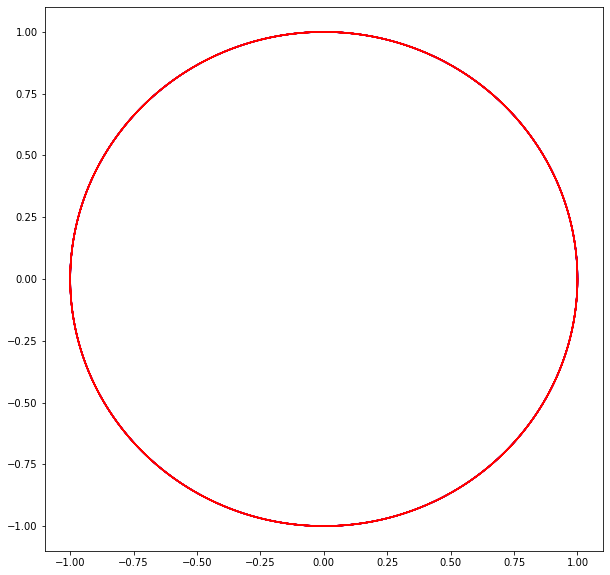

In [3]:
t_start = 0.
t_end = 50
delta_t = 0.01
t_pts = np.arange(t_start, t_end+delta_t, delta_t)

G = 1
m1 = 1
m2 = 1
M = m1/m2

# Instantiate two-body gravitation class 
orbit1 = Two_Body_Orbit(G, m1, m2)


x1_0 = -1
x1_dot_0 = 0.
y1_0 = 0.
y1_dot_0 = 0.5

x2_0 = -M * x1_0
x2_dot_0 = -M * x1_dot_0
y2_0 = -M * y1_0
y2_dot_0 = -M * y1_dot_0

initcond = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit1.solve_ode(t_pts, initcond)

figure = plt.figure(figsize=(10,10))
ax1 = figure.add_subplot(1,1,1)

ax1.plot(x1,y1, color = 'blue')
ax1.plot(x2,y2,color = 'red')

# One mass larger than the other

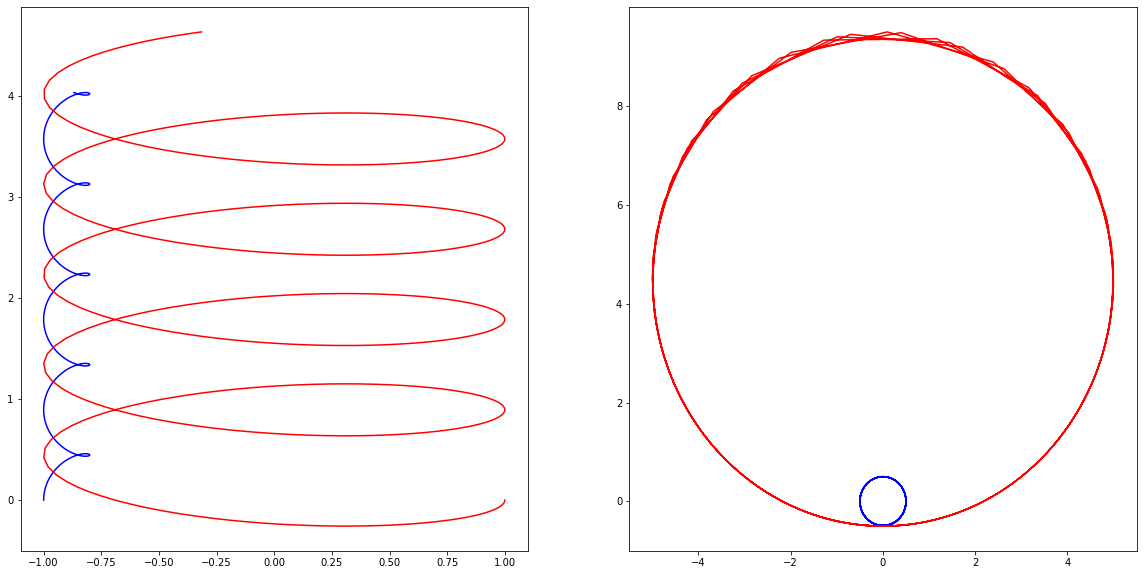

In [4]:
m1 = 10
m2 = 1
orbit2 = Two_Body_Orbit(G, m1, m2)
x1_0 = -1
x1_dot_0 = 0.
y1_0 = 0.
y1_dot_0 = 0.5

# Initial conditions to set center of mass velocity to zero
x2_0 = -M * x1_0
x2_dot_0 = -M * x1_dot_0
y2_0 = -M * y1_0
y2_dot_0 = -M * y1_dot_0
initcond = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


t_start = 0.
t_end = 10
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit2.solve_ode(t_pts, initcond)

figure = plt.figure(figsize=(20,10))
ax1 = figure.add_subplot(1,2,1)

ax1.plot(x1,y1, color = 'blue')
ax1.plot(x2,y2,color = 'red')

ax2 = figure.add_subplot(1,2,2)
ax2.plot(x1_dot,y1_dot, color = 'blue')
ax2.plot(x2_dot,y2_dot,color = 'red')

As you can see, the motion for mass one starts to approximate a straight line. If you increase the mass further, this becomes more obvious

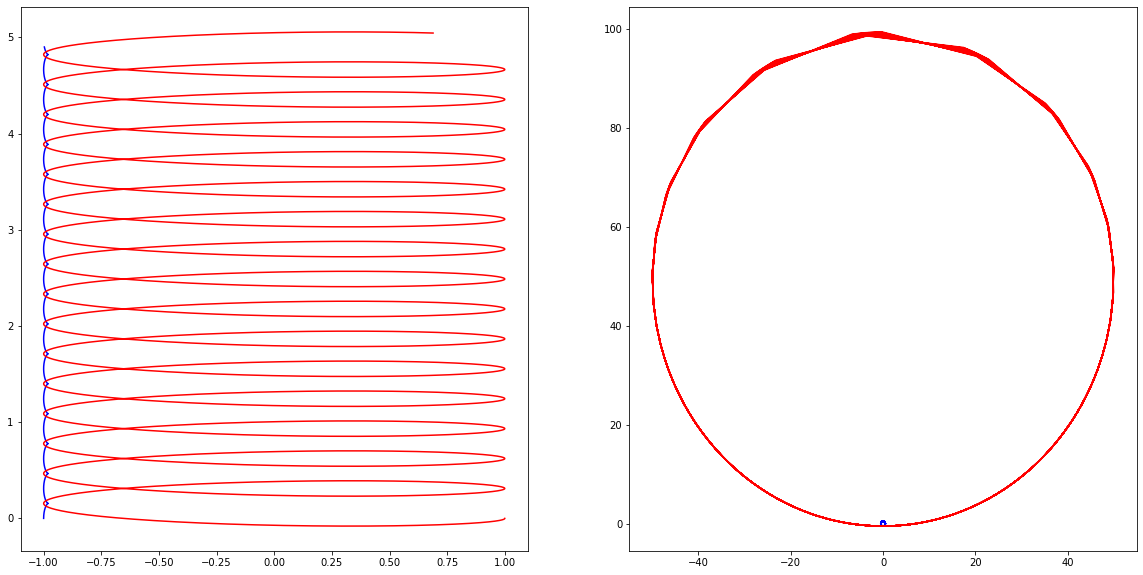

In [5]:
m1 = 100
m2 = 1
orbit_lopside = Two_Body_Orbit(G, m1, m2)
x1_0 = -1
x1_dot_0 = 0.
y1_0 = 0.
y1_dot_0 = 0.5

# Initial conditions to set center of mass velocity to zero
x2_0 = -M * x1_0
x2_dot_0 = -M * x1_dot_0
y2_0 = -M * y1_0
y2_dot_0 = -M * y1_dot_0
initcond = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


t_start = 0.
t_end = 10
delta_t = 0.0001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit_lopside.solve_ode(t_pts, initcond)

figure = plt.figure(figsize=(20,10))
ax1 = figure.add_subplot(1,2,1)

ax1.plot(x1,y1, color = 'blue')
ax1.plot(x2,y2,color = 'red')

ax2 = figure.add_subplot(1,2,2)
ax2.plot(x1_dot,y1_dot, color = 'blue')
ax2.plot(x2_dot,y2_dot,color = 'red')

# Solving the Differential Equation with Leapfrog Method

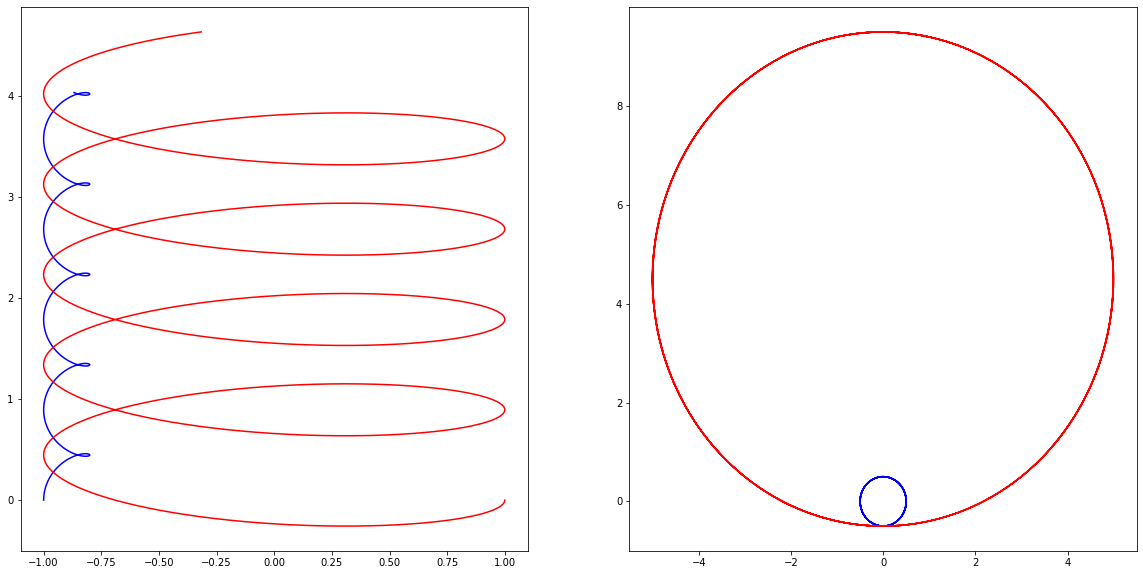

In [6]:
m1 = 10
m2 = 1
orbit_leapfrog = Two_Body_Orbit(G=G, m1=m1, m2=m2)
x1_0 = -1
x1_dot_0 = 0.
y1_0 = 0.
y1_dot_0 = 0.5


x2_0 = -M * x1_0
x2_dot_0 = -M * x1_dot_0
y2_0 = -M * y1_0
y2_dot_0 = -M * y1_dot_0
initcond = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]


t_start = 0.
t_end = 10
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = orbit_leapfrog.solve_ode_Leapfrog(t_pts, initcond, delta_t)

figure = plt.figure(figsize=(20,10))
ax1 = figure.add_subplot(1,2,1)

ax1.plot(x1,y1, color = 'blue')
ax1.plot(x2,y2,color = 'red')

ax2 = figure.add_subplot(1,2,2)
ax2.plot(x1_dot,y1_dot, color = 'blue')
ax2.plot(x2_dot,y2_dot,color = 'red')